# Read ALAMO/ALTO float data and save as netcdf

k.drushka // Jan 2023

In [9]:
# MIGHT NOT NEED ALL OF THESE


# Native packages
from math import radians, degrees, sin, cos, asin, acos, sqrt
import datetime
import time
import sys
import os
from pathlib import Path 
import glob

import json
            
import warnings

# Third-party packages for data manipulation
import numpy as np
import pandas as pd
import xarray as xr

import dateutil.parser

# Third-party packages for data interpolation
from scipy import interpolate
# Third-party packages for data visualizations
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [6]:
datadir = '/Users/kdrushka/data/sassie/alamo_alto/'
filenames = glob.glob(datadir + '*')
filenames

['/Users/kdrushka/data/sassie/alamo_alto/11131_profile.json']

In [86]:
filename = filenames[0]
filename

# Open JSON file
f = open(filename,)
 
# return JSON object as a dictionary
jdict = json.load(f)
data = jdict['data']
    
    
# load into a pandas dataframe
df = pd.DataFrame([data[i][0],data[i][1],data[i][2],data[i][3],data[i][4],data[i][5],data[i][6]] for i in range(len(data)))       
df.columns = jdict['columns']
df



,dive,pres,temp,tcnd,saln,dens,sigma0
0,0,1.48,1.223,None,24.401,19.534,19.525
1,0,2.04,1.221,None,24.399,19.535,19.523
2,0,3.00,1.220,None,24.400,19.540,19.524
3,0,3.96,1.219,None,24.404,19.548,19.527
4,0,5.08,1.217,None,24.373,19.529,19.502
...,...,...,...,...,...,...,...
39158,98,1995.96,-0.395,None,34.936,37.398,28.083
39159,98,1998.00,-0.395,None,34.936,37.407,28.083
39160,98,2000.04,-0.395,None,34.936,37.416,28.083
39161,98,2001.76,-0.394,None,34.936,37.424,28.083


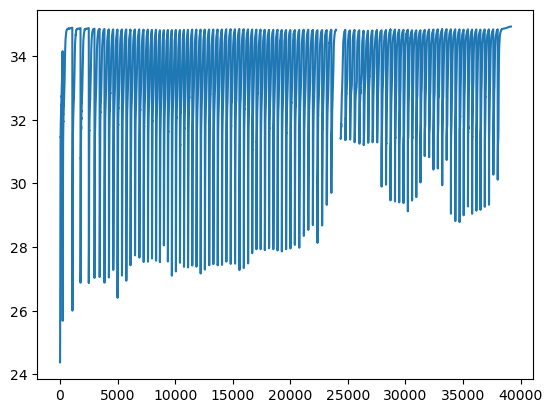

In [85]:
# test plot
plt.plot(df['saln'])
   